# Figure 05
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### November 2018
### Milo BC @ UC Berkeley

### Goal:

<div class="alert alert-info">
Another plot show ghost rays as a function of the size of front and rear blockers.
<div/>

### Concentrate first in this one

I already have something like this

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_NR_All_Drays, F309_NR_All_Hrays, F309_NR_All_Prays = [], [], []
F309_NR_All_Dx, F309_NR_All_Dy, F309_NR_All_Hx, F309_NR_All_Hy, F309_NR_All_Px, F309_NR_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_NR_All_Drays.append(Drays)
    F309_NR_All_Hrays.append(Hrays)
    F309_NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Hx.append(Hx)
    F309_NR_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_NR_All_Px.append(Px)
    F309_NR_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_NR_All_Dx.append(Dx)
    F309_NR_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [2]:
Rout = 3.29
fbr = 3.09671
F309_NR_Doubles, F309_NR_Hyp, F309_NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_NR_Doubles.append(len(F309_NR_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_NR_Hyp.append(len(F309_NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_NR_Par.append(len(F309_NR_All_Prays[i]) * (Rout**2 - fbr**2))

In [3]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 2.62
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R262_All_Drays, F309_R262_All_Hrays, F309_R262_All_Prays = [], [], []
F309_R262_All_Dx, F309_R262_All_Dy, F309_R262_All_Hx, F309_R262_All_Hy, F309_R262_All_Px, F309_R262_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R262_All_Drays.append(Drays)
    F309_R262_All_Hrays.append(Hrays)
    F309_R262_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R262_All_Hx.append(Hx)
    F309_R262_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R262_All_Px.append(Px)
    F309_R262_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R262_All_Dx.append(Dx)
    F309_R262_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R262/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [4]:
Rout = 3.29
fbr = 3.17
F309_R262_Doubles, F309_R262_Hyp, F309_R262_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R262_Doubles.append(len(F309_R262_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R262_Hyp.append(len(F309_R262_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R262_Par.append(len(F309_R262_All_Prays[i]) * (Rout**2 - fbr**2))

In [5]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 2.64
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R264_All_Drays, F309_R264_All_Hrays, F309_R264_All_Prays = [], [], []
F309_R264_All_Dx, F309_R264_All_Dy, F309_R264_All_Hx, F309_R264_All_Hy, F309_R264_All_Px, F309_R264_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R264_All_Drays.append(Drays)
    F309_R264_All_Hrays.append(Hrays)
    F309_R264_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R264_All_Hx.append(Hx)
    F309_R264_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R264_All_Px.append(Px)
    F309_R264_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R264_All_Dx.append(Dx)
    F309_R264_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R264/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [6]:
Rout = 3.29
fbr = 3.17
F309_R264_Doubles, F309_R264_Hyp, F309_R264_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R264_Doubles.append(len(F309_R264_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R264_Hyp.append(len(F309_R264_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R264_Par.append(len(F309_R264_All_Prays[i]) * (Rout**2 - fbr**2))

In [7]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 2.66
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R266_All_Drays, F309_R266_All_Hrays, F309_R266_All_Prays = [], [], []
F309_R266_All_Dx, F309_R266_All_Dy, F309_R266_All_Hx, F309_R266_All_Hy, F309_R266_All_Px, F309_R266_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R266_All_Drays.append(Drays)
    F309_R266_All_Hrays.append(Hrays)
    F309_R266_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R266_All_Hx.append(Hx)
    F309_R266_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R266_All_Px.append(Px)
    F309_R266_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R266_All_Dx.append(Dx)
    F309_R266_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R266/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [8]:
Rout = 3.29
fbr = 3.17
F309_R266_Doubles, F309_R266_Hyp, F309_R266_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R266_Doubles.append(len(F309_R266_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R266_Hyp.append(len(F309_R266_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R266_Par.append(len(F309_R266_All_Prays[i]) * (Rout**2 - fbr**2))

In [9]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.09671
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


F309_R268_All_Drays, F309_R268_All_Hrays, F309_R268_All_Prays = [], [], []
F309_R268_All_Dx, F309_R268_All_Dy, F309_R268_All_Hx, F309_R268_All_Hy, F309_R268_All_Px, F309_R268_All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and abs(ray.des[1])<= 0.48 and abs(ray.des[0])<= 0.48 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    F309_R268_All_Drays.append(Drays)
    F309_R268_All_Hrays.append(Hrays)
    F309_R268_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Hx.append(Hx)
    F309_R268_All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    F309_R268_All_Px.append(Px)
    F309_R268_All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    F309_R268_All_Dx.append(Dx)
    F309_R268_All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F309R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

In [10]:
Rout = 3.29
fbr = 3.17
F309_R268_Doubles, F309_R268_Hyp, F309_R268_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    F309_R268_Doubles.append(len(F309_R268_All_Drays[i]) * (Rout**2 - fbr**2))
    F309_R268_Hyp.append(len(F309_R268_All_Hrays[i]) * (Rout**2 - fbr**2))
    F309_R268_Par.append(len(F309_R268_All_Prays[i]) * (Rout**2 - fbr**2))

# Plotting:

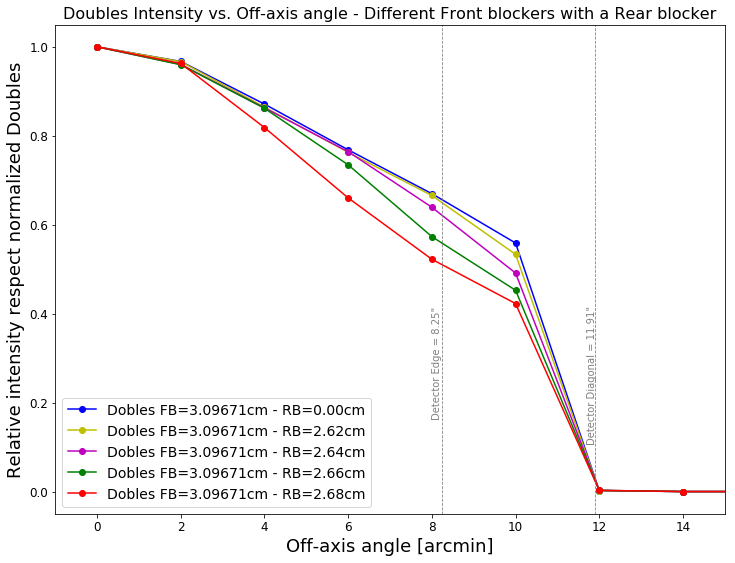

In [11]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Doubles Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'bo-',label='Dobles FB=3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Doubles/max(np.array(F309_R262_Doubles)),'yo-',label='Dobles FB=3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Doubles/max(np.array(F309_R264_Doubles)),'mo-',label='Dobles FB=3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Doubles/max(np.array(F309_R266_Doubles)),'go-',label='Dobles FB=3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'ro-',label='Dobles FB=3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,15))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

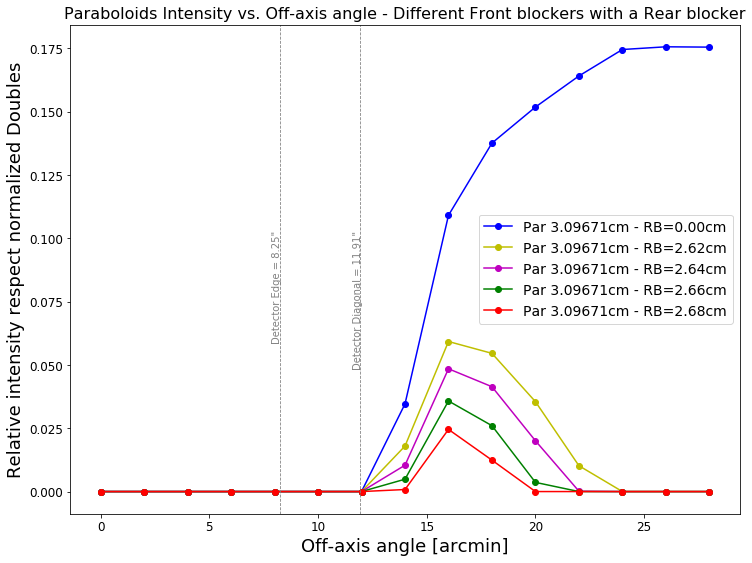

In [12]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Paraboloids Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'bo-',label='Par 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Par/max(np.array(F309_R262_Doubles)),'yo-',label='Par 3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Par/max(np.array(F309_R264_Doubles)),'mo-',label='Par 3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Par/max(np.array(F309_R266_Doubles)),'go-',label='Par 3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'ro-',label='Par 3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

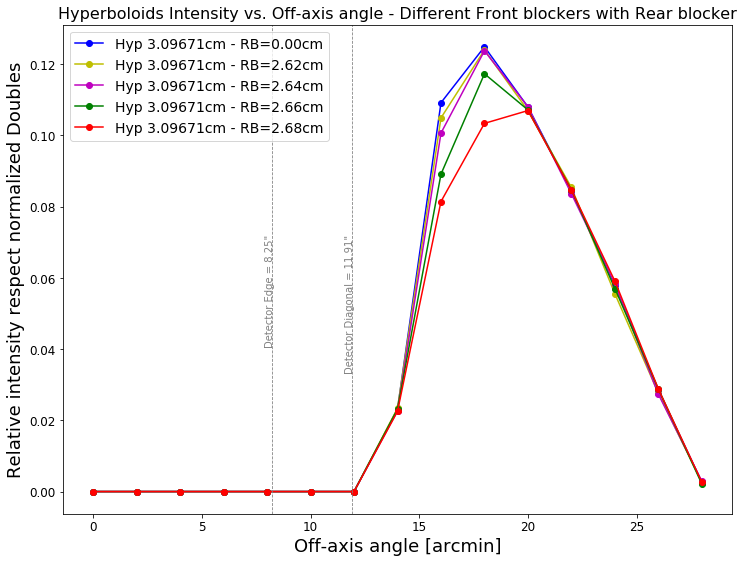

In [13]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Hyperboloids Intensity vs. Off-axis angle - Different Front blockers with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'bo-',label='Hyp 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Hyp/max(np.array(F309_R262_Doubles)),'yo-',label='Hyp 3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Hyp/max(np.array(F309_R264_Doubles)),'mo-',label='Hyp 3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Hyp/max(np.array(F309_R266_Doubles)),'go-',label='Hyp 3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Hyp/max(np.array(F309_R268_Doubles)),'ro-',label='Hyp 3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

## Plots together:

(-1, 30)

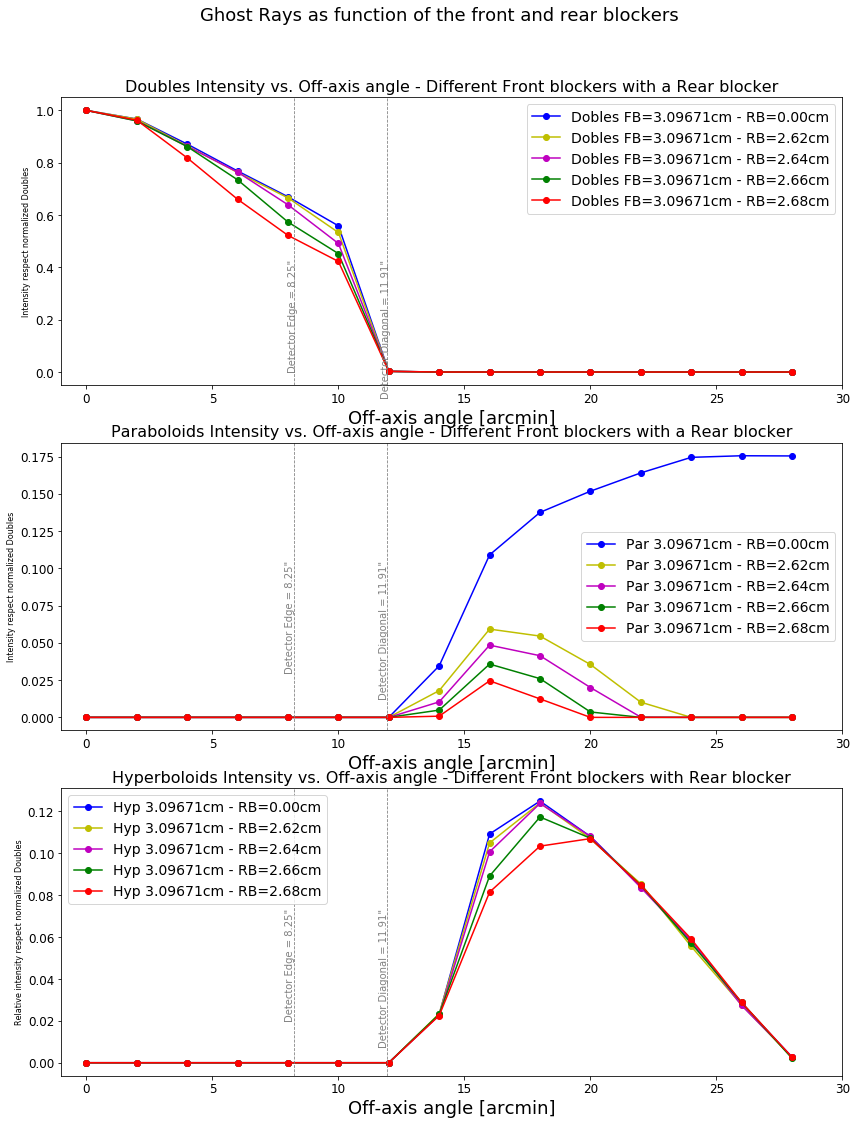

In [31]:
fig = plt.figure(figsize=(14,18))
st = fig.suptitle("Ghost Rays as function of the front and rear blockers", fontsize=18,y=.95)
## Straight-Through
plt.subplot(3,1,1)
plt.title('Doubles Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Doubles/max(np.array(F309_NR_Doubles)),'bo-',label='Dobles FB=3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Doubles/max(np.array(F309_R262_Doubles)),'yo-',label='Dobles FB=3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Doubles/max(np.array(F309_R264_Doubles)),'mo-',label='Dobles FB=3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Doubles/max(np.array(F309_R266_Doubles)),'go-',label='Dobles FB=3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Doubles/max(np.array(F309_R268_Doubles)),'ro-',label='Dobles FB=3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Intensity respect normalized Doubles',fontsize=8)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.xlim((-1,30))
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(8.0,0.4,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.7,0.4,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.subplot(3,1,2)
plt.title('Paraboloids Intensity vs. Off-axis angle - Different Front blockers with a Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Par/max(np.array(F309_NR_Doubles)),'bo-',label='Par 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Par/max(np.array(F309_R262_Doubles)),'yo-',label='Par 3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Par/max(np.array(F309_R264_Doubles)),'mo-',label='Par 3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Par/max(np.array(F309_R266_Doubles)),'go-',label='Par 3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Par/max(np.array(F309_R268_Doubles)),'ro-',label='Par 3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Intensity respect normalized Doubles',fontsize=8)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.1,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.1,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.xlim((-1,30))
plt.subplot(3,1,3)
plt.title('Hyperboloids Intensity vs. Off-axis angle - Different Front blockers with Rear blocker',fontsize=16)
plt.plot(offaxisAngles, F309_NR_Hyp/max(np.array(F309_NR_Doubles)),'bo-',label='Hyp 3.09671cm - RB=0.00cm')
plt.plot(offaxisAngles, F309_R262_Hyp/max(np.array(F309_R262_Doubles)),'yo-',label='Hyp 3.09671cm - RB=2.62cm')
plt.plot(offaxisAngles, F309_R264_Hyp/max(np.array(F309_R264_Doubles)),'mo-',label='Hyp 3.09671cm - RB=2.64cm')
plt.plot(offaxisAngles, F309_R266_Hyp/max(np.array(F309_R266_Doubles)),'go-',label='Hyp 3.09671cm - RB=2.66cm')
plt.plot(offaxisAngles, F309_R268_Hyp/max(np.array(F309_R268_Doubles)),'ro-',label='Hyp 3.09671cm - RB=2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=8)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.25,color='Grey',linestyle='--',lw=0.8)
plt.text(7.9,0.07,'Detector Edge = 8.25"',rotation=90,fontsize=10,color='Grey')
plt.axvline(11.91,color='Grey',linestyle='--',lw=0.8)
plt.text(11.6,0.07,'Detector Diagonal = 11.91"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.xlim((-1,30))